<a href="https://colab.research.google.com/github/MK316/Workingpapers/blob/main/ksat_dataprocess_items.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KSAT data process (as of 0926)

## Read data file from Github, Add string length, Number of splitted words (N_Splits)

data: https://raw.githubusercontent.com/MK316/Workingpapers/main/Analysis/ksatdata_12only.csv (12 only, Q41 removed)

In [48]:
import pandas as pd

In [49]:
url = 'https://raw.githubusercontent.com/MK316/Workingpapers/main/Analysis/ksatdata_12only.csv'
df1 = pd.read_csv(url)

In [50]:
df1

,Year,Category,QN,Passage
0,2022,Context,Q40,Philip Kitcher and Wesley Salmon have suggeste...
1,2021,Context,Q40,From a cross-cultural perspective the equation...
2,2020,Context,Q40,"Biological organisms, including human societie..."
3,2019,Context,Q40,"Biological organisms, including human societie..."
4,2018,Context,Q40,Time spent on on-line interaction with members...
...,...,...,...,...
123,2019,Context,Q18,"Dear Mr. Reese,\nA few days ago, I submitted m..."
124,2018,Context,Q18,"Dear Ms. Diane Edwards,\nI am a teacher workin..."
125,2017,Context,Q18,Want to improve your Korean writing? Writing i...
126,2016,Context,Q18,"Dear Coach Johnson,\nMy name is Christina Mark..."


Adding a colum with length info

In [51]:
df2 = df1

In [52]:
# Added column: String length
length = []

for i in range(0, len(df2['Passage'])):
  LEN = len(df2['Passage'][i])
  length.append(LEN)

df2['String'] = length
df2

,Year,Category,QN,Passage,String
0,2022,Context,Q40,Philip Kitcher and Wesley Salmon have suggeste...,1069
1,2021,Context,Q40,From a cross-cultural perspective the equation...,1086
2,2020,Context,Q40,"Biological organisms, including human societie...",1052
3,2019,Context,Q40,"Biological organisms, including human societie...",1052
4,2018,Context,Q40,Time spent on on-line interaction with members...,1171
...,...,...,...,...,...
123,2019,Context,Q18,"Dear Mr. Reese,\nA few days ago, I submitted m...",578
124,2018,Context,Q18,"Dear Ms. Diane Edwards,\nI am a teacher workin...",627
125,2017,Context,Q18,Want to improve your Korean writing? Writing i...,736
126,2016,Context,Q18,"Dear Coach Johnson,\nMy name is Christina Mark...",666


In [53]:
# Added column:  Splitted words, Length of splitted words
tsplit = []
splen = []

for i in range(0, len(df2['Passage'])):
  TSP = df2['Passage'][i].split()
  SPLEN = len(TSP)
  tsplit.append(TSP)
  splen.append(SPLEN)
  # print(TSP)

df2['Splits'] = tsplit
df2['N_Splits'] = splen
df2

,Year,Category,QN,Passage,String,Splits,N_Splits
0,2022,Context,Q40,Philip Kitcher and Wesley Salmon have suggeste...,1069,"[Philip, Kitcher, and, Wesley, Salmon, have, s...",154
1,2021,Context,Q40,From a cross-cultural perspective the equation...,1086,"[From, a, cross-cultural, perspective, the, eq...",180
2,2020,Context,Q40,"Biological organisms, including human societie...",1052,"[Biological, organisms,, including, human, soc...",154
3,2019,Context,Q40,"Biological organisms, including human societie...",1052,"[Biological, organisms,, including, human, soc...",154
4,2018,Context,Q40,Time spent on on-line interaction with members...,1171,"[Time, spent, on, on-line, interaction, with, ...",175
...,...,...,...,...,...,...,...
123,2019,Context,Q18,"Dear Mr. Reese,\nA few days ago, I submitted m...",578,"[Dear, Mr., Reese,, A, few, days, ago,, I, sub...",105
124,2018,Context,Q18,"Dear Ms. Diane Edwards,\nI am a teacher workin...",627,"[Dear, Ms., Diane, Edwards,, I, am, a, teacher...",113
125,2017,Context,Q18,Want to improve your Korean writing? Writing i...,736,"[Want, to, improve, your, Korean, writing?, Wr...",119
126,2016,Context,Q18,"Dear Coach Johnson,\nMy name is Christina Mark...",666,"[Dear, Coach, Johnson,, My, name, is, Christin...",128


## Histogram to check the word length

data: df2

In [54]:
import matplotlib.pyplot as plt

In [57]:
df2.describe()

,Year,String,N_Splits
count,128.000000,128.000000,128.000000
mean,2018.500000,925.312500,151.648438
std,2.300291,152.155057,20.306157
min,2015.000000,575.000000,105.000000
25%,2016.750000,820.500000,135.750000
50%,2018.500000,950.000000,154.500000
75%,2020.250000,1046.250000,166.250000
max,2022.000000,1264.000000,195.000000


(array([ 7.,  6.,  9., 12., 19., 22., 25., 15., 11.,  2.]),
 array([105., 114., 123., 132., 141., 150., 159., 168., 177., 186., 195.]),
 <a list of 10 Patch objects>)

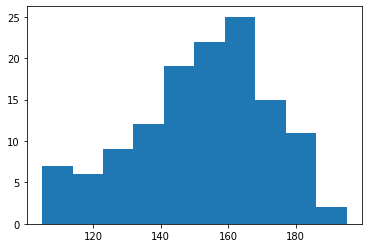

In [55]:
plt.hist(df2['N_Splits'])

# Lexical Diversity Indices (10 types)

## Getting LD indices

In [65]:
!pip install lexical-diversity
from lexical_diversity import lex_div as ld

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Added column: String length
lem = []

for i in range(0, len(df2['Passage'])):
  LEM = ld.flemmatize(df2['Passage'][i])
  print(LEM)
  lem.append(LEM)

df2['Lemma'] = lem

In [61]:
df2

,Year,Category,QN,Passage,String,Splits,N_Splits,Lemma
0,2022,Context,Q40,Philip Kitcher and Wesley Salmon have suggeste...,1069,"[Philip, Kitcher, and, Wesley, Salmon, have, s...",154,"[philip, kitcher, and, wesley, salmon, have, s..."
1,2021,Context,Q40,From a cross-cultural perspective the equation...,1086,"[From, a, cross-cultural, perspective, the, eq...",180,"[from, a, crosscultural, perspective, the, equ..."
2,2020,Context,Q40,"Biological organisms, including human societie...",1052,"[Biological, organisms,, including, human, soc...",154,"[biological, organism, include, human, society..."
3,2019,Context,Q40,"Biological organisms, including human societie...",1052,"[Biological, organisms,, including, human, soc...",154,"[biological, organism, include, human, society..."
4,2018,Context,Q40,Time spent on on-line interaction with members...,1171,"[Time, spent, on, on-line, interaction, with, ...",175,"[time, spend, on, online, interaction, with, m..."
...,...,...,...,...,...,...,...,...
123,2019,Context,Q18,"Dear Mr. Reese,\nA few days ago, I submitted m...",578,"[Dear, Mr., Reese,, A, few, days, ago,, I, sub...",105,"[dear, mr, reese, a, few, day, ago, i, submit,..."
124,2018,Context,Q18,"Dear Ms. Diane Edwards,\nI am a teacher workin...",627,"[Dear, Ms., Diane, Edwards,, I, am, a, teacher...",113,"[dear, ms, diane, edwards, i, be, a, teacher, ..."
125,2017,Context,Q18,Want to improve your Korean writing? Writing i...,736,"[Want, to, improve, your, Korean, writing?, Wr...",119,"[want, to, improve, your, korean, writing, wri..."
126,2016,Context,Q18,"Dear Coach Johnson,\nMy name is Christina Mark...",666,"[Dear, Coach, Johnson,, My, name, is, Christin...",128,"[dear, coach, johnson, my, name, be, christina..."


In [62]:
# ADD LD indices

#1. Create empty lists.
TTR = []
RTTR = []
LogTTR = []
MSTTR = []
FDTTR = []
MATTR = []
HDD = []
MTLD = []
BILOG = []
MA = []

# 2. Getting LD index values for each cell:

for i in range(0, len(df2['Lemma'])):
  flt = df2['Lemma'][i]
  ttr = ld.ttr(flt)
  rttr = ld.root_ttr(flt)
  logttr = ld.log_ttr(flt)
  msttr = ld.maas_ttr(flt)
  fdttr = ld.msttr(flt)
  mattr = ld.mattr(flt)
  hdd = ld.hdd(flt)
  mtld = ld.mtld(flt)
  bilog = ld.mtld_ma_wrap(flt)
  ma = ld.mtld_ma_bid(flt)

  # Add values to each list
  TTR.append(ttr)
  RTTR.append(rttr)
  LogTTR.append(logttr)
  MSTTR.append(msttr)
  FDTTR.append(fdttr)
  MATTR.append(mattr)
  HDD.append(hdd)
  MTLD.append(mtld)
  BILOG.append(bilog)
  MA.append(ma)

# Add columns
df2['TTR'] = TTR
df2['RTTR'] = RTTR
df2['LogTTR'] = LogTTR
df2['MSTTR'] = MSTTR
df2['FDTTR'] = FDTTR
df2['MATTR'] = MATTR
df2['HDD'] = HDD
df2['MTLD'] = MTLD
df2['BILOG'] = BILOG
df2['MA'] = MA

## Result file

In [ ]:
df2

In [64]:
df2.describe()

,Year,String,N_Splits,TTR,RTTR,LogTTR,MSTTR,FDTTR,MATTR,HDD,MTLD,BILOG,MA
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,2018.500000,925.312500,151.648438,0.605471,7.417595,0.899153,0.046290,0.771536,0.770702,0.802420,70.465927,70.750469,63.347698
std,2.300291,152.155057,20.306157,0.056931,0.666567,0.018109,0.007980,0.048950,0.045449,0.039086,19.495300,20.041444,18.757406
min,2015.000000,575.000000,105.000000,0.451282,5.376082,0.843935,0.032568,0.630000,0.581905,0.686500,33.165609,32.157895,0.000000
25%,2016.750000,820.500000,135.750000,0.569889,7.000837,0.888727,0.040028,0.745000,0.750179,0.779164,56.232643,57.424318,52.435550
50%,2018.500000,950.000000,154.500000,0.603484,7.383389,0.898958,0.046482,0.776667,0.775913,0.807191,69.453261,68.756833,62.218431
75%,2020.250000,1046.250000,166.250000,0.647586,7.862256,0.913771,0.050668,0.801667,0.801374,0.830868,83.217863,83.409023,73.543475
max,2022.000000,1264.000000,195.000000,0.728972,9.071147,0.932349,0.073482,0.890000,0.866111,0.880651,128.591868,122.560510,110.240000


# Plotting

In [ ]:
from matplotlib import pyplot as plt

In [67]:
ordered_ttr = list(df2['TTR']).sort()
ordered_ttr

In [68]:
a1 = df2[['N_Splits','TTR','MSTTR']]
a2 = a1.sort_values(by=['N_Splits'])
a2

,N_Splits,TTR,MSTTR
123,105,0.685714,0.040110
122,105,0.685714,0.040110
121,105,0.695238,0.038643
127,107,0.728972,0.033336
120,110,0.600000,0.053236
...,...,...,...
68,181,0.508287,0.057658
48,182,0.478022,0.062756
26,185,0.589189,0.044697
29,186,0.618280,0.040541


In [69]:
df3 = df2.sort_values(by=['N_Splits'])

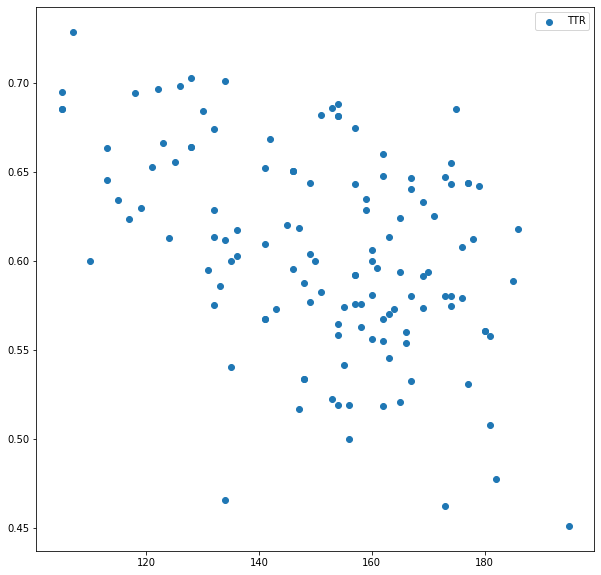

In [74]:
f = plt.figure(figsize=(10, 10))
plt.scatter(df2['N_Splits'],df2['TTR'],  label='TTR')
# plt.scatter(df2['N_Splits'],df2['LogTTR'],  label='LogTTR')
# plt.scatter(df2['N_Splits'],df2['MSTTR'],  label='MSTTR')
plt.legend()

### Linear regression of TTR and Length

In [81]:
# importing the required library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

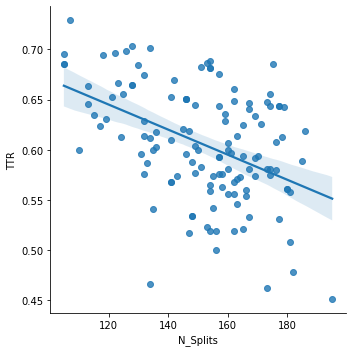

In [86]:
# # f = plt.figure(figsize=(10, 10))
# fig, (ax1, ax2) = plt.subplots(1, 2)
# fig.suptitle('Horizontally stacked subplots')
# data
df = df2
 
# scatter plot with regression
# line(by default)
sns.lmplot(x ='N_Splits', y ='TTR', data = df)
 
# Show the plot
plt.show()

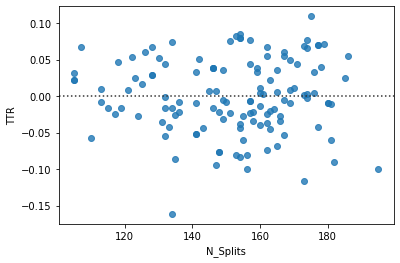

In [93]:
# Residual plots
sns.residplot(x ='N_Splits', y ='TTR', data = df)

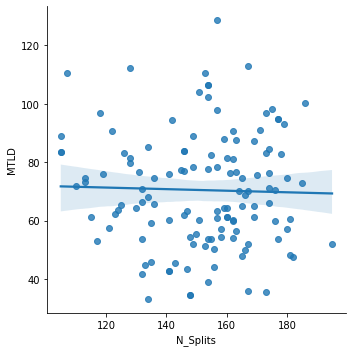

In [87]:
sns.lmplot(x ='N_Splits', y ='MTLD', data = df)
 
# Show the plot
plt.show()

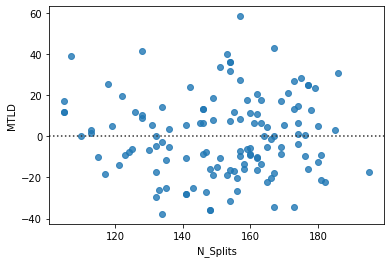

In [94]:
# Residual plots
sns.residplot(x ='N_Splits', y ='MTLD', data = df)

In [88]:
import statsmodels.api as sm

X = df["N_Splits"]
y = df["TTR"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    TTR   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              3320.
Date:                Mon, 26 Sep 2022   Prob (F-statistic):                    6.67e-93
Time:                        13:00:17   Log-Likelihood:                          93.302
No. Observations:                 128   AIC:                                     -184.6
Df Residuals:                     127   BIC:                                     -181.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
N_Splits       0.0039   6.77e-05     57.616      0.000       0.004       0.004
==============================================================================
Omnibus:                        2.527   Durbin-Watson:                   1.052
Prob(Omnibus):                  0.283   Jarque-Bera (JB):                2.414
Skew:                           0.334   Prob(JB):                        0.299
Kurtosis:                       2.921   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
X = df["N_Splits"]
y = df["MTLD"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MTLD   R-squared (uncentered):                   0.911
Model:                            OLS   Adj. R-squared (uncentered):              0.911
Method:                 Least Squares   F-statistic:                              1305.
Date:                Mon, 26 Sep 2022   Prob (F-statistic):                    1.17e-68
Time:                        13:00:48   Log-Likelihood:                         -575.94
No. Observations:                 128   AIC:                                      1154.
Df Residuals:                     127   BIC:                                      1157.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
N_Splits       0.4561      0.013     36.119      0.000       0.431       0.481
==============================================================================
Omnibus:                        3.045   Durbin-Watson:                   1.561
Prob(Omnibus):                  0.218   Jarque-Bera (JB):                3.077
Skew:                           0.352   Prob(JB):                        0.215
Kurtosis:                       2.713   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### MTLD grouped plots

In [101]:
datatop = df2.tail()
datatop

,Year,Category,QN,Passage,String,Splits,N_Splits,Lemma,TTR,RTTR,LogTTR,MSTTR,FDTTR,MATTR,HDD,MTLD,BILOG,MA
123,2019,Context,Q18,"Dear Mr. Reese,\nA few days ago, I submitted m...",578,"[Dear, Mr., Reese,, A, few, days, ago,, I, sub...",105,"[dear, mr, reese, a, few, day, ago, i, submit,...",0.685714,7.026481,0.918931,0.040110,0.81,0.766786,0.810360,83.649431,76.466667,62.060588
124,2018,Context,Q18,"Dear Ms. Diane Edwards,\nI am a teacher workin...",627,"[Dear, Ms., Diane, Edwards,, I, am, a, teacher...",113,"[dear, ms, diane, edwards, i, be, a, teacher, ...",0.663717,7.055407,0.913293,0.042233,0.83,0.799063,0.837067,73.332384,78.893805,63.557692
125,2017,Context,Q18,Want to improve your Korean writing? Writing i...,736,"[Want, to, improve, your, Korean, writing?, Wr...",119,"[want, to, improve, your, korean, writing, wri...",0.630252,6.875239,0.903406,0.046539,0.79,0.804286,0.813637,76.120146,73.680672,70.791103
126,2016,Context,Q18,"Dear Coach Johnson,\nMy name is Christina Mark...",666,"[Dear, Coach, Johnson,, My, name, is, Christin...",128,"[dear, coach, johnson, my, name, be, christina...",0.664062,7.513010,0.915627,0.040040,0.79,0.783291,0.820006,79.756780,79.500000,67.593462
127,2015,Context,Q18,One difference between winners and losers is h...,635,"[One, difference, between, winners, and, loser...",107,"[one, difference, between, winner, and, loser,...",0.728972,7.540545,0.932349,0.033336,0.79,0.794828,0.841506,110.542069,107.811321,0.000000


column names

In [98]:
for col in df2.columns:
    print(col)

Year
Category
QN
Passage
String
Splits
N_Splits
Lemma
TTR
RTTR
LogTTR
MSTTR
FDTTR
MATTR
HDD
MTLD
BILOG
MA


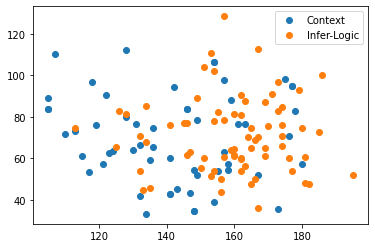

In [125]:
groups = df2.groupby("Category")
for name, group in groups:
    plt.plot(group["N_Splits"], group["MTLD"], marker="o", linestyle="", label=name)
plt.legend()

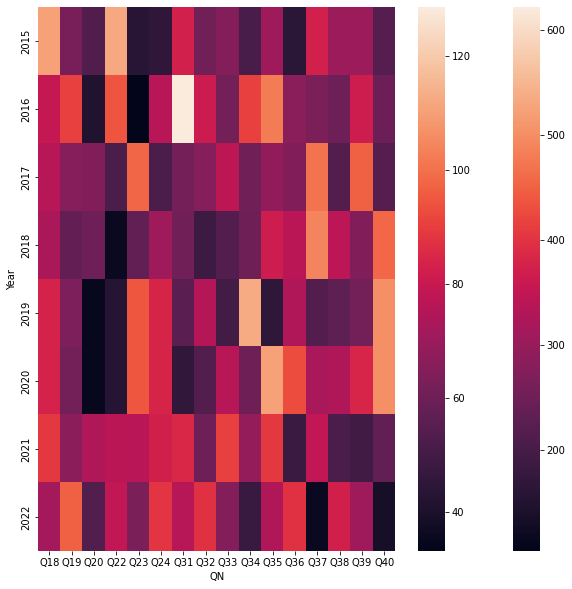

In [127]:
f = plt.figure(figsize=(10, 10))
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(flights)

data = df2
data = data.pivot("Year", "QN", "MTLD")
ax = sns.heatmap(data)

In [ ]:
import pandas as pd
import numpy as np

rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.347533,0.398948,0.455743,0.072914,-0.233402,-0.731222,0.477978,-0.442621,0.015185
1,0.347533,1.000000,-0.284056,0.571003,-0.285483,0.382480,-0.362842,0.642578,0.252556,0.190047
2,0.398948,-0.284056,1.000000,-0.523649,0.152937,-0.139176,-0.092895,0.016266,-0.434016,-0.383585
3,0.455743,0.571003,-0.523649,1.000000,-0.225343,-0.227577,-0.481548,0.473286,0.279258,0.446650
4,0.072914,-0.285483,0.152937,-0.225343,1.000000,-0.104438,-0.147477,-0.523283,-0.614603,-0.189916
5,-0.233402,0.382480,-0.139176,-0.227577,-0.104438,1.000000,-0.030252,0.417640,0.205851,0.095084
6,-0.731222,-0.362842,-0.092895,-0.481548,-0.147477,-0.030252,1.000000,-0.494440,0.381407,-0.353652
7,0.477978,0.642578,0.016266,0.473286,-0.523283,0.417640,-0.494440,1.000000,0.375873,0.417863
8,-0.442621,0.252556,-0.434016,0.279258,-0.614603,0.205851,0.381407,0.375873,1.000000,0.150421
9,0.015185,0.190047,-0.383585,0.446650,-0.189916,0.095084,-0.353652,0.417863,0.150421,1.000000


In [ ]:
df3

,Year,Category,QN,Passage,String,Splits,N_Splits,Lemma,TTR,RTTR,LogTTR,MSTTR,FDTTR,MATTR,HDD,MTLD,BILOG,MA
51,2019,Context,Q18,"Dear Mr. Reese,\nA few days ago, I submitted m...",578,"[Dear, Mr., Reese,, A, few, days, ago,, I, sub...",105,"[dear, mr, reese, a, few, day, ago, i, submit,...",0.685714,7.026481,0.918931,0.040110,0.810,0.766786,0.810360,83.649431,76.466667,62.060588
34,2020,Context,Q18,"Dear Mr. Reese,\nA few days ago, I submitted m...",578,"[Dear, Mr., Reese,, A, few, days, ago,, I, sub...",105,"[dear, mr, reese, a, few, day, ago, i, submit,...",0.685714,7.026481,0.918931,0.040110,0.810,0.766786,0.810360,83.649431,76.466667,62.060588
17,2021,Context,Q18,"Dear Friends,\nSeason_s greetings. As some of ...",611,"[Dear, Friends,, Season_s, greetings., As, som...",105,"[dear, friend, season, greeting, as, some, of,...",0.695238,7.124071,0.921894,0.038643,0.790,0.782500,0.836292,89.071602,75.857143,52.282982
119,2015,Context,Q18,One difference between winners and losers is h...,635,"[One, difference, between, winners, and, loser...",107,"[one, difference, between, winner, and, loser,...",0.728972,7.540545,0.932349,0.033336,0.790,0.794828,0.841506,110.542069,107.811321,0.000000
0,2022,Context,Q18,"Dear Ms. Green,\nMy name is Donna Williams, a ...",637,"[Dear, Ms., Green,, My, name, is, Donna, Willi...",110,"[dear, ms, green, my, name, be, donna, william...",0.600000,6.292853,0.891325,0.053236,0.790,0.763279,0.782583,71.694409,63.127273,57.933236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,2019,Context,Q41,"Industrial capitalism not only created work, i...",1608,"[Industrial, capitalism, not, only, created, w...",254,"[industrial, capitalism, not, only, create, wo...",0.559055,8.909872,0.894984,0.043669,0.796,0.789366,0.822339,79.721184,84.039370,74.195627
7,2022,Context,Q41,Classifying things together into groups is som...,1429,"[Classifying, things, together, into, groups, ...",254,"[classify, thing, together, into, group, be, s...",0.531496,8.470653,0.885855,0.047465,0.756,0.742439,0.783105,58.513907,59.295276,53.015209
41,2020,Context,Q41,"Industrial capitalism not only created work, i...",1608,"[Industrial, capitalism, not, only, created, w...",254,"[industrial, capitalism, not, only, create, wo...",0.559055,8.909872,0.894984,0.043669,0.796,0.789366,0.822339,79.721184,84.039370,74.195627
126,2015,Context,Q41,Increased size affects group life in a number ...,1540,"[Increased, size, affects, group, life, in, a,...",257,"[increase, size, affect, group, life, in, a, n...",0.494163,7.922042,0.872972,0.052710,0.752,0.758558,0.786371,59.559458,57.607004,56.914059


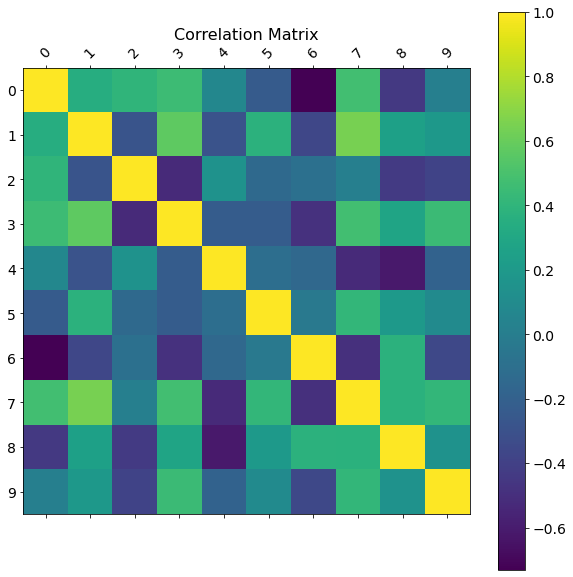

In [ ]:
f = plt.figure(figsize=(10, 10))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9
0,0.548814,0.715189,0.602763,0.544883,0.423655,0.645894,0.437587,0.891773,0.963663,0.383442
1,0.791725,0.528895,0.568045,0.925597,0.071036,0.087129,0.020218,0.832620,0.778157,0.870012
2,0.978618,0.799159,0.461479,0.780529,0.118274,0.639921,0.143353,0.944669,0.521848,0.414662
3,0.264556,0.774234,0.456150,0.568434,0.018790,0.617635,0.612096,0.616934,0.943748,0.681820
4,0.359508,0.437032,0.697631,0.060225,0.666767,0.670638,0.210383,0.128926,0.315428,0.363711
5,0.570197,0.438602,0.988374,0.102045,0.208877,0.161310,0.653108,0.253292,0.466311,0.244426
6,0.158970,0.110375,0.656330,0.138183,0.196582,0.368725,0.820993,0.097101,0.837945,0.096098
7,0.976459,0.468651,0.976761,0.604846,0.739264,0.039188,0.282807,0.120197,0.296140,0.118728
8,0.317983,0.414263,0.064147,0.692472,0.566601,0.265389,0.523248,0.093941,0.575946,0.929296
9,0.318569,0.667410,0.131798,0.716327,0.289406,0.183191,0.586513,0.020108,0.828940,0.004695


In [ ]:
# df4 = df3.iloc[:, [6,8,9,10,11,12,13,14,15,16,17]]

In [ ]:
# import seaborn as sns; sns.set_theme()